In [586]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [587]:
#Values for bandwith distribution per day
usageHoursWeekday = {
    0: 5.168,
    0.5: 4.788,
    1.0: 4.294,
    1.5: 4.018,
    2.0: 3.635,
    2.5: 3.523,
    3.0: 3.287,
    3.5: 3.286,
    4.0: 3.137,
    4.5: 3.189,
    5.0: 3.157,
    5.5: 3.281,
    6.0: 3.431,
    6.5: 3.795,
    7.0: 4.113,
    7.5: 4.695,
    8.0: 5.344,
    8.5: 6.155,
    9.0: 6.668,
    9.5: 7.241,
    10.0: 7.101,
    10.5: 7.404,
    11.0: 7.263,
    11.5: 7.369,
    12.0: 7.206,
    12.5: 7.212,
    13.0: 6.992,
    13.5: 7.231,
    14.0: 7.536,
    14.5: 7.649,
    15.0: 7.497,
    15.5: 7.659,
    16.0: 7.805,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.527,
    18.5: 7.723,
    19.0: 7.756,
    19.5: 7.882,
    20.0: 7.985,
    20.5: 8.111,
    21.0: 8.019,
    21.5: 7.913,
    22.0: 7.564,
    22.5: 7.093,
    23.0: 6.455,
    23.5: 5.844,
}

usageHoursWeekend = {
    0: 5.745,
    0.5: 5.383,
    1.0: 4.838,
    1.5: 4.525,
    2.0: 4.103,
    2.5: 3.902,
    3.0: 3.584,
    3.5: 3.519,
    4.0: 3.338,
    4.5: 3.339,
    5.0: 3.308,
    5.5: 3.319,
    6.0: 3.364,
    6.5: 3.651,
    7.0: 3.698,
    7.5: 4.041,
    8.0: 4.359,
    8.5: 4.817,
    9.0: 5.202,
    9.5: 5.492,
    10.0: 5.667,
    10.5: 5.939,
    11.0: 5.976,
    11.5: 6.048,
    12.0: 6.283,
    12.5: 6.303,
    13.0: 6.404,
    13.5: 6.601,
    14.0: 6.714,
    14.5: 6.868,
    15.0: 6.965,
    15.5: 6.994,
    16.0: 7.207,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.847,
    18.5: 7.865,
    19.0: 7.973,
    19.5: 8.102,
    20.0: 7.968,
    20.5: 7.858,
    21.0: 7.768,
    21.5: 7.843,
    22.0: 7.582,
    22.5: 7.372,
    23.0: 6.829,
    23.5: 6.254,
}


# make numpy array of values
weekdayNpY = np.array(list(usageHoursWeekday.values())).reshape(-1, 1)
weekendNpY = np.array(list(usageHoursWeekend.values())).reshape(-1, 1)

# subtract minimum value from weekday and weekend as we can assume this is servers that are always on
minWeekday = np.min(weekdayNpY)
minWeekend = np.min(weekendNpY)

weekdayNpY = weekdayNpY - minWeekday
weekendNpY = weekendNpY - minWeekend

Weekday area under curve:  71.17899999999999
Weekend area under curve:  60.29175000000001
Weekday Mb:  256244.39999999997
Weekend Mb:  217050.30000000002


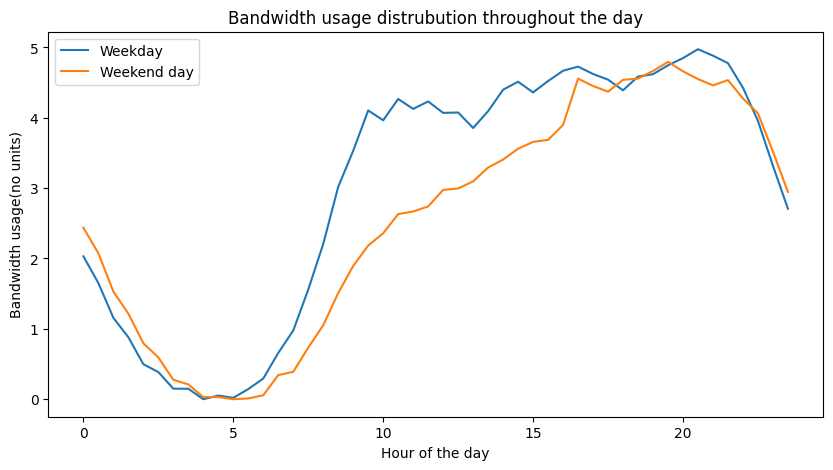

In [588]:
# plot the distribution of bandwith usage data
plt.figure(figsize=(10, 5))
plt.plot(usageHoursWeekday.keys(), weekdayNpY, label="Weekday")
plt.plot(usageHoursWeekend.keys(), weekendNpY, label="Weekend day")
plt.xlabel("Hour of the day")
plt.ylabel("Bandwidth usage(no units)")
plt.title("Bandwidth usage distrubution throughout the day")
plt.legend()

# calculate the area under the plot using numpy
# multiplying by 0.5 because the graph needs to be shrunk in half because the graph should be going up in half and hour intervals(0.5) as a result area under curves halves
weekdayAreaUnderCurve = np.trapz(weekdayNpY, axis=0)*0.5
weekdayAreaUnderCurve = weekdayAreaUnderCurve[0]

weekendAreaUnderCurve = np.trapz(weekendNpY, axis=0)*0.5
weekendAreaUnderCurve = weekendAreaUnderCurve[0]

secondsInAnHour = 3600
weekdayMb = weekdayAreaUnderCurve * secondsInAnHour
weekendMb = weekendAreaUnderCurve * secondsInAnHour

print("Weekday area under curve: ", weekdayAreaUnderCurve)
print("Weekend area under curve: ", weekendAreaUnderCurve)

print("Weekday Mb: ", weekdayMb)
print("Weekend Mb: ", weekendMb)
plt.show()

In [597]:
# manually calculate the total Mb used by a given Family per week by multiplying how many hours 
# that given Family does a given activity by the Mb used per hour for that activity then
# summing all the activities

# family 1:
#totalFamilyMbPerWeek = 1235096

# family 2:
#totalFamilyMbPerWeek = 995491

# family 3:
totalFamilyMbPerWeek = 1419291

# weighted mean of the Mb per week into Mb per weekday and Mb per weekend day based off bandwidth usage during weekends compared to weekdays in the given reference data
referenceDataWeightedMean = ((weekdayMb*5 + weekendMb*2))/7
totalFamilyMbWeekday = (weekdayMb/referenceDataWeightedMean) * (totalFamilyMbPerWeek / 7)
totalFamilyMbWeekend = (weekendMb/referenceDataWeightedMean) * (totalFamilyMbPerWeek / 7)

print("Total Family Mb per weekday: ", totalFamilyMbWeekday)
print("Total Family Mb per weekend: ", totalFamilyMbWeekend)

#print("Recalculated Total Family Mb per week: ", totalFamilyMbWeekday*5 + totalFamilyMbWeekend*2)

Total Family Mb per weekday:  212021.5583473336
Total Family Mb per weekend:  179591.60413166598


In [598]:
# calculates k value to multiply the reference data by to get the total Mb per weekday/weekend day
k = totalFamilyMbWeekday/weekdayMb

print("k: ", round(k, 2))
familyUsageHoursWeekday = np.array(weekdayNpY) * k
familyUsageHoursWeekend = np.array(weekendNpY) * k

k:  0.83


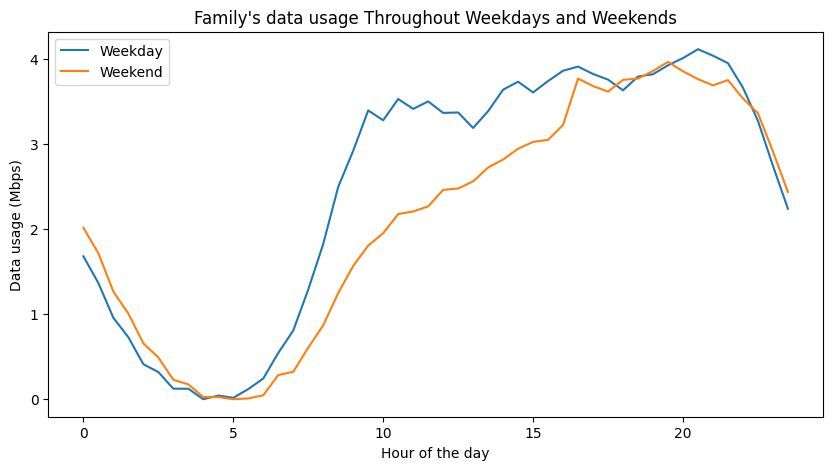

In [599]:
# plots the data
plt.figure(figsize=(10, 5))
plt.plot(usageHoursWeekday.keys(), familyUsageHoursWeekday, label="Weekday")
plt.plot(usageHoursWeekend.keys(), familyUsageHoursWeekend, label="Weekend")
plt.xlabel("Hour of the day")
plt.ylabel("Data usage (Mbps)")
plt.title("Family's data usage Throughout Weekdays and Weekends")
plt.legend()
plt.show()

In [600]:
# calculates the minimum bandwidth required to fulfill the family's needs 90% of the time
familyUsageHoursWeekday = np.sort(familyUsageHoursWeekday)
familyUsageHoursWeekend = np.sort(familyUsageHoursWeekend)

#familyUsageHoursWeekday = familyUsageHoursWeekday[round(len(familyUsageHoursWeekday) * 0.9)]
#familyUsageHoursWeekend = familyUsageHoursWeekend[round(len(familyUsageHoursWeekend) * 0.9)]
familyUsageHoursWeekday=np.percentile(familyUsageHoursWeekday,99)
familyUsageHoursWeekend=np.percentile(familyUsageHoursWeekend,99)
print("90th percentile of weekday time to fulfill bandwidth usage: ", round(familyUsageHoursWeekday, 2), "Mbps")
print("90th percentile of weekend day time to fulfill bandwidth usage: ", round(familyUsageHoursWeekend, 2), "Mbps")

# takes a weighted mean
weightedMean = (familyUsageHoursWeekday*5 + familyUsageHoursWeekend*2)/7

weightedMean = weightedMean / 0.65
weightedMean = round(weightedMean, 2)
print("90th percentile of weekly time to fulfill bandwidth usage: ", weightedMean, "Mbps")

90th percentile of weekday time to fulfill bandwidth usage:  4.08 Mbps
90th percentile of weekend day time to fulfill bandwidth usage:  3.92 Mbps
90th percentile of weekly time to fulfill bandwidth usage:  6.2 Mbps
